<a href="https://colab.research.google.com/github/God-Orcale/AI_Test/blob/main/Introduce_pytorch_by_ytube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [3]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [4]:
i = torch.ones((5,3),dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [5]:
torch.manual_seed(1729)
r1 = torch.rand(3,3)
print('A random tensor')
print(r1)
r2 = torch.rand(3,3),
print('\n A different random tensor')
print(r2)
torch.manual_seed(1729)
r3 = torch.rand(3,3)
print('\n should match r1')
print(r3)


A random tensor
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691],
        [0.2332, 0.4047, 0.2162]])

 A different random tensor
(tensor([[0.9927, 0.4128, 0.5938],
        [0.6128, 0.1519, 0.0453],
        [0.5035, 0.9978, 0.3884]]),)

 should match r1
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691],
        [0.2332, 0.4047, 0.2162]])


In [6]:
one = torch.ones(3,3)
print(one)
two = torch.ones(3,3) * 2
print(two)
three = one + two
print(three)
print(three.shape)
r1 = torch.rand(3,4)
r2 = torch.rand(4,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
torch.Size([3, 3])


In [7]:
r = (torch.rand(3,3)-0.5) * 2
print('A random matrix,r')
print(r)

print('\n Absolute of r')
print(torch.abs(r))

print('\n Inverese sine of r')
print(torch.asin(r))

print('\n Singular value decomposition of r')
print(torch.svd(r))

print('\n Average and standard deviation of r')
print(torch.std_mean(r))

print('\n Maximum of r')
print(torch.max(r))


A random matrix,r
tensor([[-0.5283, -0.6041, -0.3345],
        [ 0.2291,  0.1998,  0.0026],
        [ 0.8793,  0.7312,  0.0413]])

 Absolute of r
tensor([[0.5283, 0.6041, 0.3345],
        [0.2291, 0.1998, 0.0026],
        [0.8793, 0.7312, 0.0413]])

 Inverese sine of r
tensor([[-0.5566, -0.6487, -0.3411],
        [ 0.2312,  0.2012,  0.0026],
        [ 1.0744,  0.8201,  0.0413]])

 Singular value decomposition of r
torch.return_types.svd(
U=tensor([[-0.5825, -0.8127,  0.0146],
        [ 0.2081, -0.1665, -0.9638],
        [ 0.7857, -0.5584,  0.2662]]),
S=tensor([1.4435, 0.2722, 0.0094]),
V=tensor([[ 0.7248, -0.3667,  0.5832],
        [ 0.6706,  0.1815, -0.7193],
        [ 0.1579,  0.9125,  0.3775]]))

 Average and standard deviation of r
(tensor(0.5143), tensor(0.0685))

 Maximum of r
tensor(0.8793)


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  def num_flat_features(self,x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features*=s
    return num_features


In [11]:
net = LeNet()
print(net)

input = torch.rand(1,1,32,32)
print('\n Image batch shape:')
print(input.shape)


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

 Image batch shape:
torch.Size([1, 1, 32, 32])


In [13]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914,0.4822,0.4465),(0.2470,0.2435,0.2616)),
     ]
)
# transforms.ToTensor()将 Pillow 加载的图像转换为 PyTorch 张量。
# transforms.Normalize()调整张量的值，因此 他们的平均值为零，标准差为 1.0。

In [15]:
trainset = torchvision.datasets.CIFAR10(root='/data',train = True,download=True,
                                        transform = transform)

100%|██████████| 170M/170M [00:03<00:00, 44.0MB/s]


In [16]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 4,shuffle=True,num_workers = 2)
# 要求DataLoader为我们提供4张图片来自trainset，随机化它们的顺序（）shuffle=True，告诉它启动两个worker来从磁盘加载数据。

truck  ship  bird   car


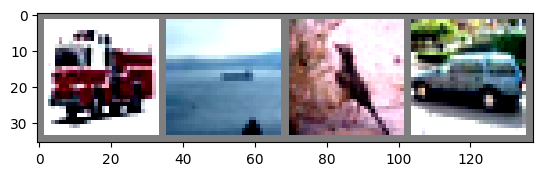

In [17]:
import matplotlib.pyplot as plt
import numpy as np
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
def imshow(img):
  img = img/2 +0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(trainloader)
images,labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

100%|██████████| 170M/170M [00:03<00:00, 48.4MB/s]


In [20]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  dataiter = iter(trainloader)
  images,labels = next(dataiter)
  imshow(torchvision.utils.make_grid(images))
  print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [32]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
net = Net()

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr =0.001,momentum=0.9)

In [34]:
for epoch in range(2):
  running_loss =0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels =data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if i %2000 == 1999:
      print('[%d, %5d] loss: %.3f' %
            (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

  print('Finished Training')

[1,  2000] loss: 2.189
[1,  4000] loss: 1.866
[1,  6000] loss: 1.669
[1,  8000] loss: 1.576
[1, 10000] loss: 1.508
[1, 12000] loss: 1.468
Finished Training
[2,  2000] loss: 1.408
[2,  4000] loss: 1.382
[2,  6000] loss: 1.343
[2,  8000] loss: 1.350
[2, 10000] loss: 1.324
[2, 12000] loss: 1.327
Finished Training


In [35]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images,labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %
